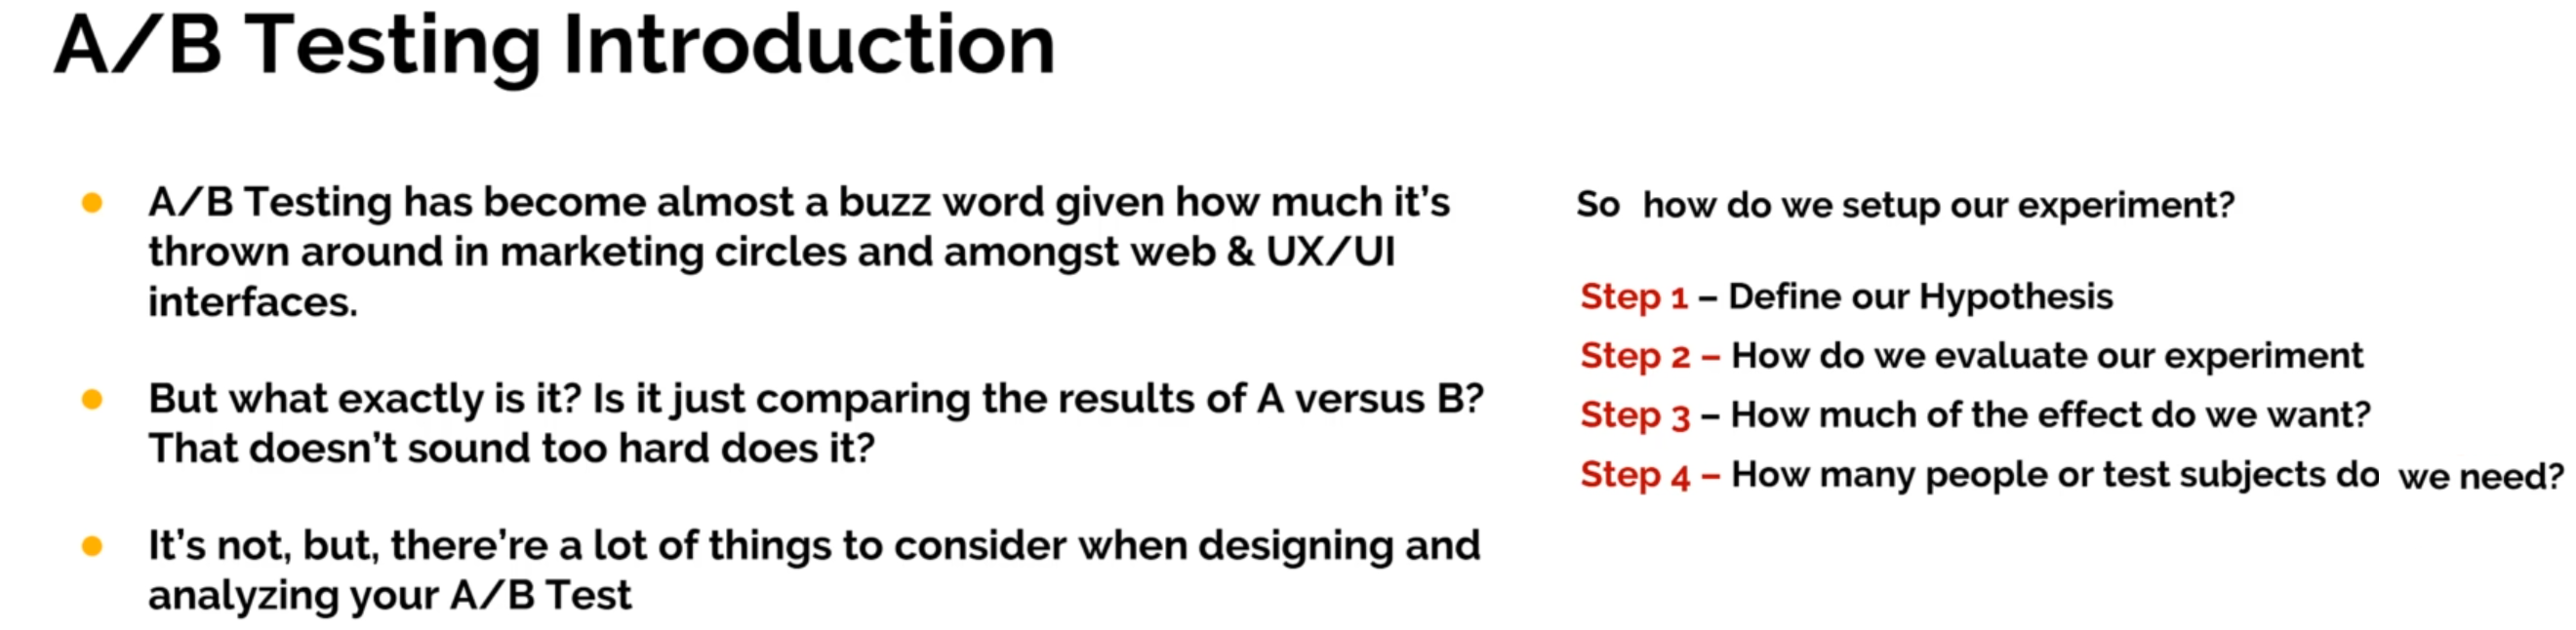

A well formed research design developed using domain knowledge, proper data collection and consideration of Power of Statistical test all are extremely important to derive useful conclusions from A/B test.

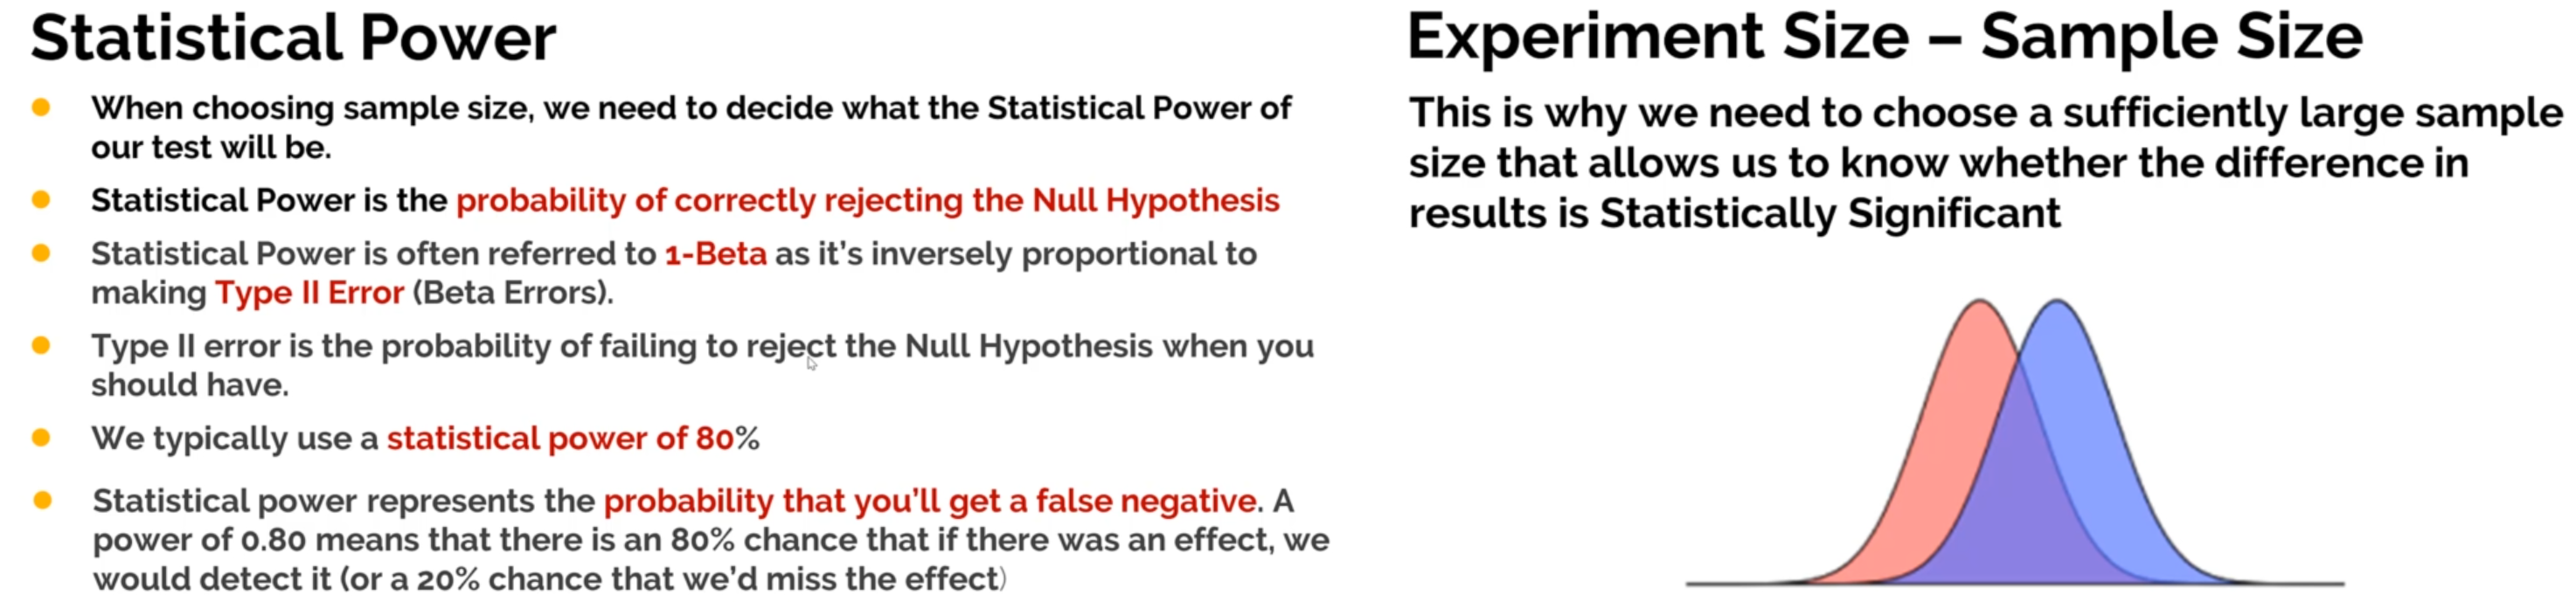

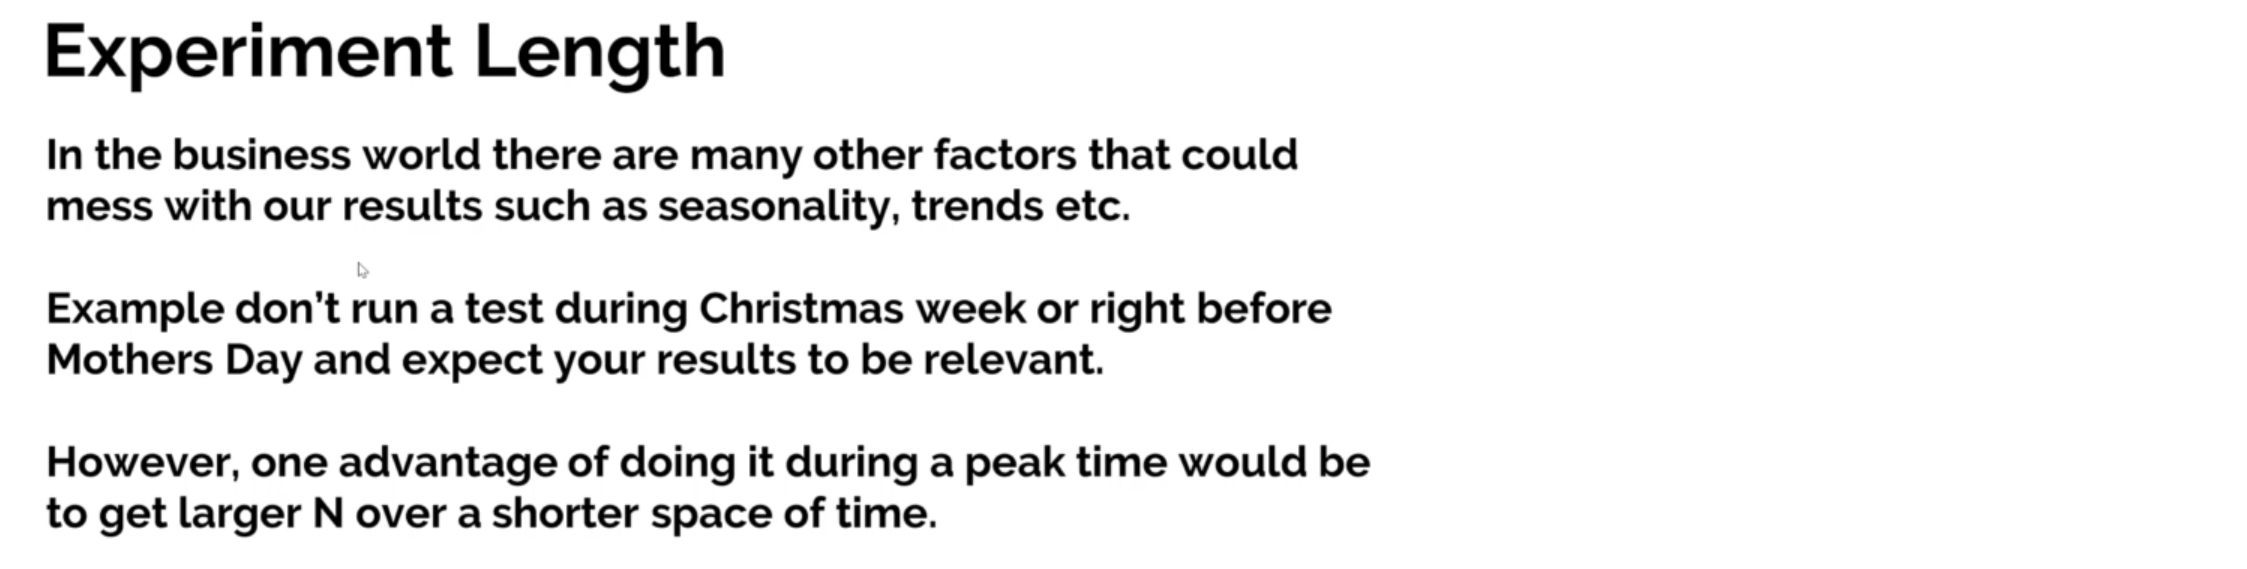

# A/B Testing Marketing Promotions

**Scenario:**

Which promotion was the most effective?

A fast food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks

**The description of the data set:**
Our data set consists of 548 entries including:
- MarketId: an inhouse tag used to describe market types, we won't be using it
- AgeOfStores: Age of store in years (1–28). The mean age of a store is 8.5 years.
- LocationID: Unique identifier for store location. Each location is identified by a number. The total number of stores is 137.
- Promotion: One of three promotions that were tested (1, 2, 3). We don’t really know the specifics of each promotion.
- **Sales in Thousands:** Sales amount for a specific LocationID, Promotion and week. The mean amount of sales are 53.5 thousand dollars. This will be our metric, We could've tweaked the research design and instead used a binary metric by simply recording response of like/dislike of the new product and consequently carry out a test of proportions instead.
- Market size: there are three types of market size: small, medium and large.
- Week: One of four weeks when the promotions were run (1–4).

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"F:\Data Science and Machine Learning\Data Sets\Marketing Analytics\WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv")

df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


## EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [10]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n", df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  548
Columns  :  7

Features : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing values :   0

Unique values :  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


**Dtype inconsistencies**

In [12]:
df[[i for i in df.columns if df[i].dtype !="object"]].columns

Index(['MarketID', 'LocationID', 'AgeOfStore', 'Promotion', 'week',
       'SalesInThousands'],
      dtype='object')

Categories are encoded as numerical features.

In [15]:
df[['MarketID','LocationID','Promotion','week']]=df[['MarketID','LocationID','Promotion','week']].astype("object")

**Summary Stats of Numerical Features**

In [16]:
df[[i for i in df.columns if df[i].dtype !="object"]].describe().T

,count,mean,std,min,25%,50%,75%,max
AgeOfStore,548.0,8.503650,6.638345,1.00,4.000,7.0,12.0000,28.00
SalesInThousands,548.0,53.466204,16.755216,17.34,42.545,50.2,60.4775,99.65


We can see sort of 2 distinct mounds.

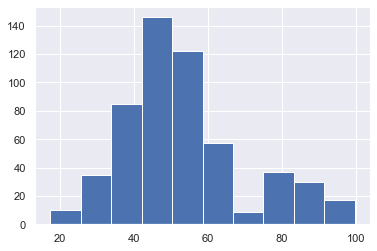

In [98]:
df['SalesInThousands'].hist();

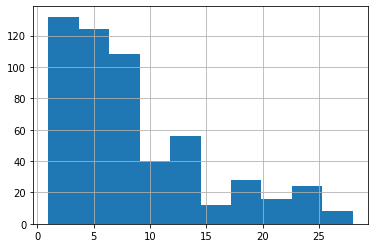

In [25]:
df['AgeOfStore'].hist();

Majority of stores are rather new where we ran our promotions.

In [22]:
for i in df[[i for i in df.columns if df[i].dtype =="object"]].columns:
    print("Cardinality of Feature {} is: ".format(i),len(df[i].value_counts()))

Cardinality of Feature MarketID is:  10
Cardinality of Feature MarketSize is:  3
Cardinality of Feature LocationID is:  137
Cardinality of Feature Promotion is:  3
Cardinality of Feature week is:  4


Let's look at how balanced the groups are.

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


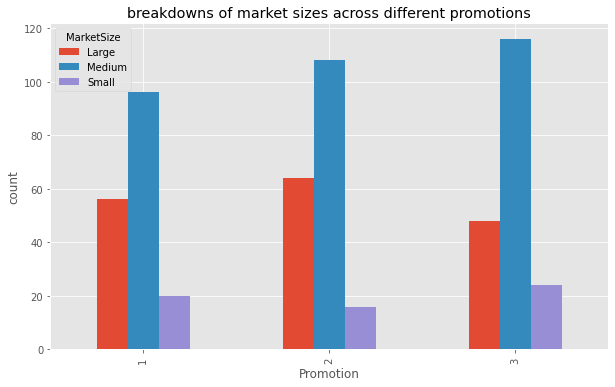

In [35]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(10,6),
    grid=True)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

Text(0.5, 1.0, 'overall distributions of age of store')

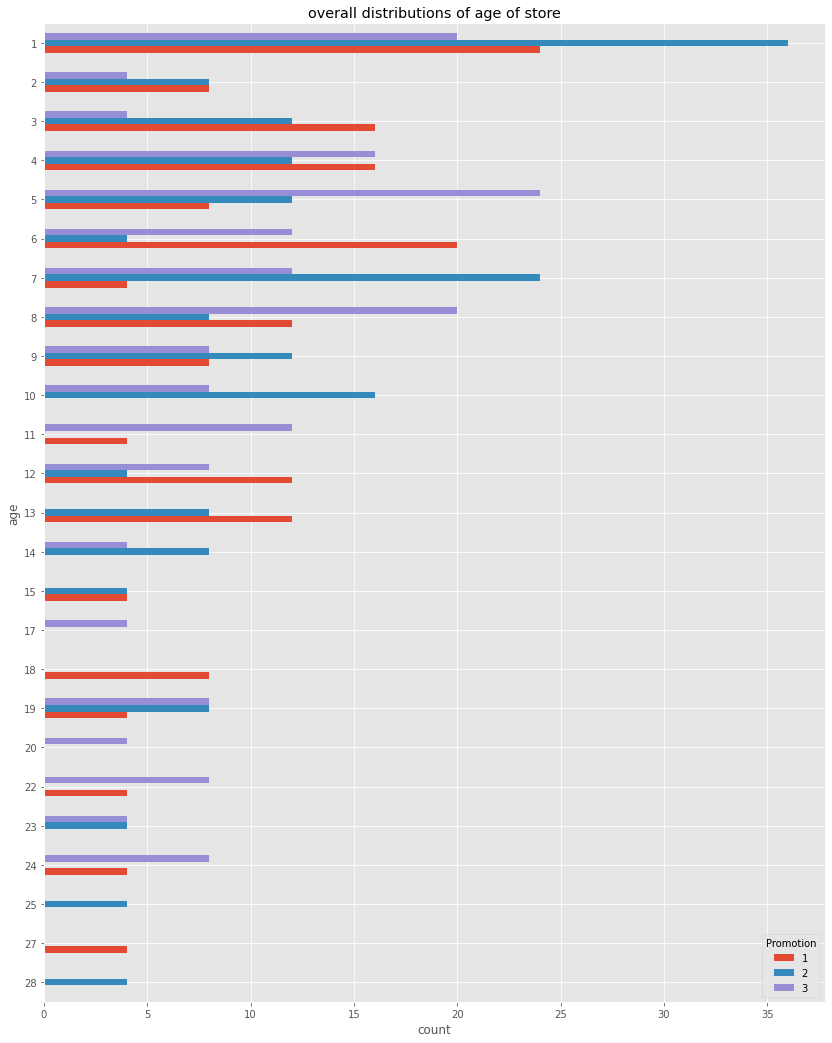

In [40]:
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh', 
    figsize=(14,18),
    grid=True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

In [42]:
df.groupby('Promotion')['AgeOfStore'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


## EDA

All test groups have similar age and market size profiles. This indicates that our sample groups are well controlled and the A/B testing results will be meaningful and trustworthy.

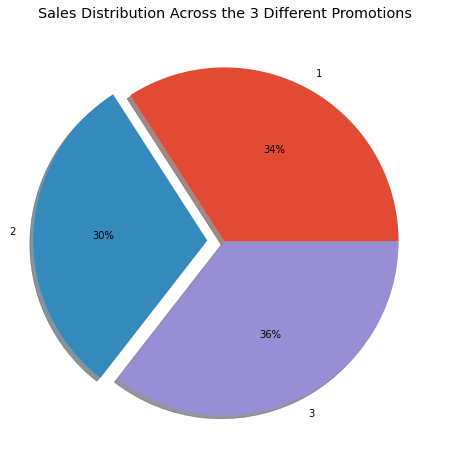

In [43]:
plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                shadow=True,
                                                                explode = (0, 0.1, 0))
ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

When there are more than 2 groups, we should be resorting to ANOVA so as to handle the Family-wise error scenario. For now we'll be using  t tests only. This will be more of a A-B-C test.

## Performing A/B Testing : Independent Two Sample t-Test

**T-Value**

The t-value measures the degree of difference relative to the variation in our data groups. Large t-values indicate a higher degree of difference between the grups.

**P-Value**

P-value measures the probability that the results would occur by random chance. Therefore the smaller the p-value is, the more statistically significant difference there will be between the two groups.

**Effect Size**

Effect size tells you how meaningful the relationship between variables or the difference between groups is. It indicates the practical significance of a research outcome.

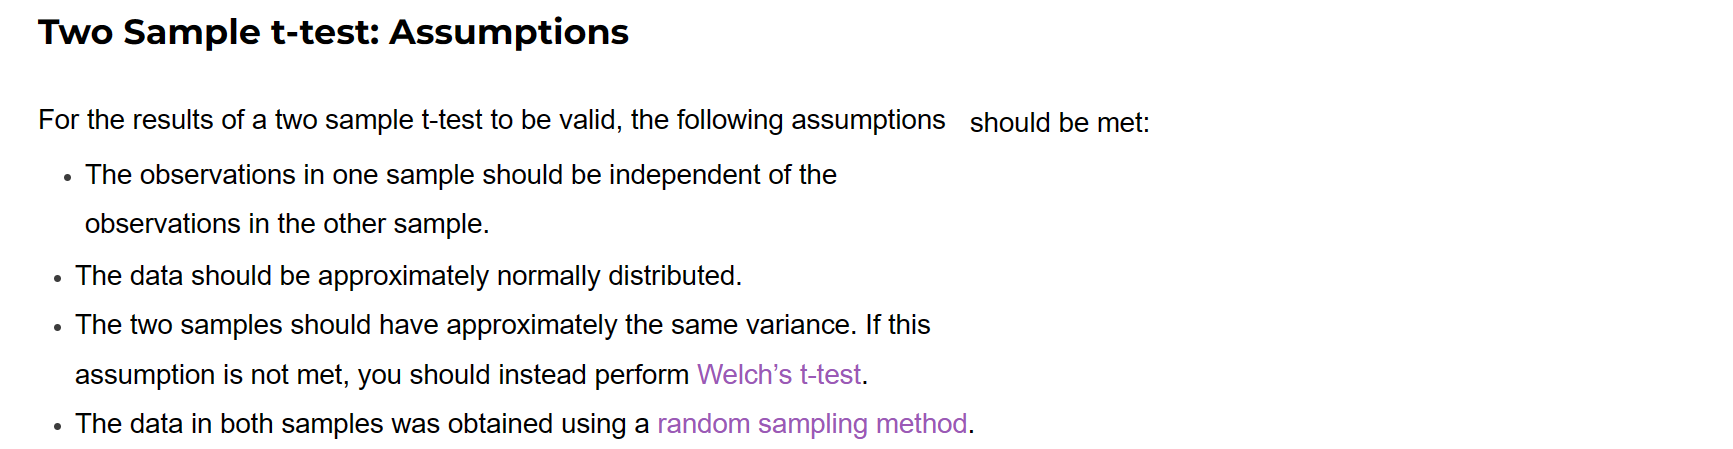

- If the data is not normally distributed, transform your dependent variable using square root, log, or Box-Cox. However with larger sample sizes, departure from normality is less problematic as the Central Limit Theorem will kick in to give a normally distributed sampling distribution.
- If your data don’t follow the 3 assumptions above, it is possible to carry out the non parametric equivalent Mann-Whitney U test

### Comparing Promotion 1 vs Promotion 2

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

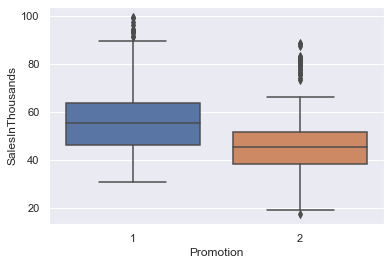

In [96]:
import seaborn as sns
sns.set()

sns.boxplot(x='Promotion', y='SalesInThousands', data=df[(df['Promotion'] == 1) | (df['Promotion'] == 2)])

it’s virtually guaranteed that the mean SalesInThousands between the two samples will be at least a little different. The question is whether or not this difference is statistically significant. 

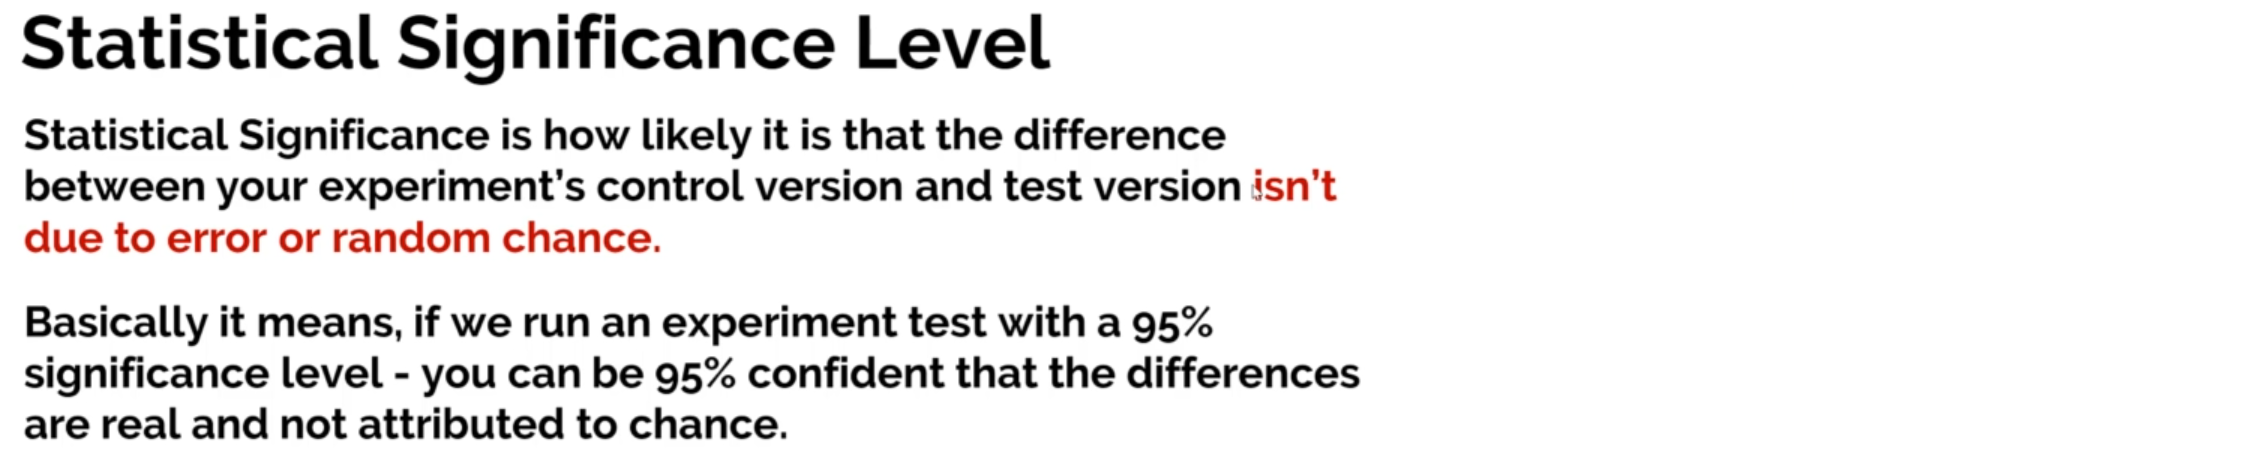

Fortunately, a two sample t-test allows us to answer this question.

In [56]:
print(len(df.loc[df['Promotion'] == 1, 'SalesInThousands']))
print(len(df.loc[df['Promotion'] == 2, 'SalesInThousands']))

172
188


<Axes: >

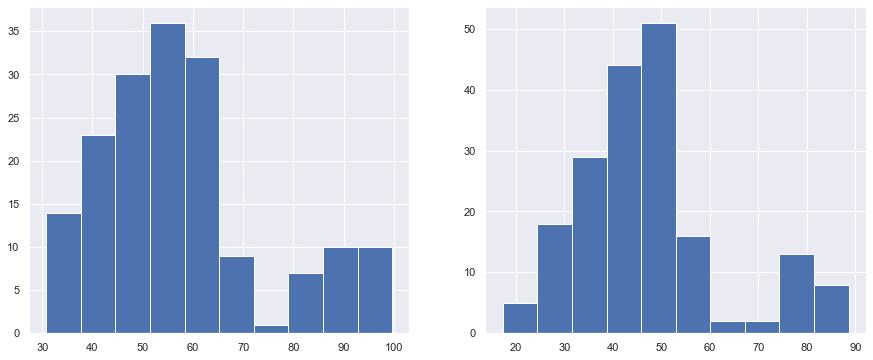

In [121]:
fig, axes = plt.subplots(1, 2)

df[df['Promotion']==1]['SalesInThousands'].hist(ax=axes[0],figsize=(15,6))
df[df['Promotion']==2]['SalesInThousands'].hist(ax=axes[1])

With larger sample sizes, departure from normality is less problematic as the Central Limit Theorem will kick in to give a normally distributed sampling distribution.

**Assumption 2 : Equal Variance :**

As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1. 

In [52]:
print(np.var(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values)/ np.var(df.loc[df['Promotion'] == 2, 'SalesInThousands'].values))

1.1998018039665885


This means we can assume that the population variances are equal.

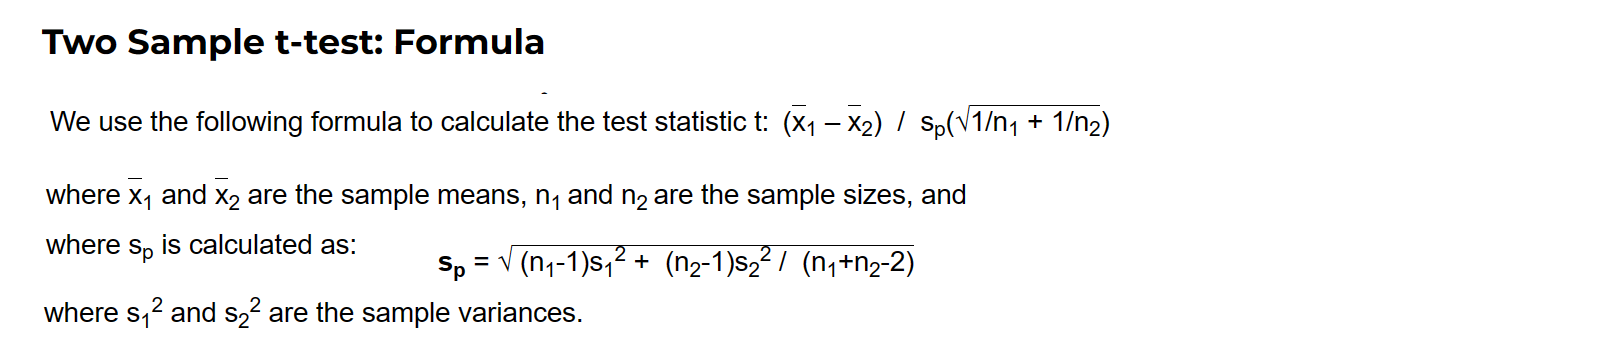

In [51]:
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=True)    # equal_var=False gives the welch test
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.453671702181005
p-value = 3.5506696512134566e-10


Our P-Value is close to 0 which suggests that there is good evidence to REJECT the Null Hypothesis. Meaning the there is a statistical difference between the two groups. Our threshold rejectings the Null is usually less than 0.05.

Our t-test shows that the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2.

**Effect Size:**

In [61]:
from statistics import mean, stdev
from math import sqrt

# test conditions
group1 = df.loc[df['Promotion'] == 1, 'SalesInThousands'].values
group2 = df.loc[df['Promotion'] == 2, 'SalesInThousands'].values

cohens_d = (mean(group1) - mean(group2)) / (sqrt((stdev(group1) ** 2 + stdev(group2) ** 2) / 2))

print(cohens_d)

0.679562341440671


We can conclude a medium effect.

### Comparing Promotion 1 vs Promotion 3

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

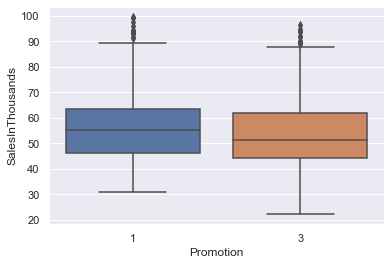

In [95]:
sns.boxplot(x='Promotion', y='SalesInThousands', data=df[(df['Promotion'] == 1) | (df['Promotion'] == 3)])

<Axes: >

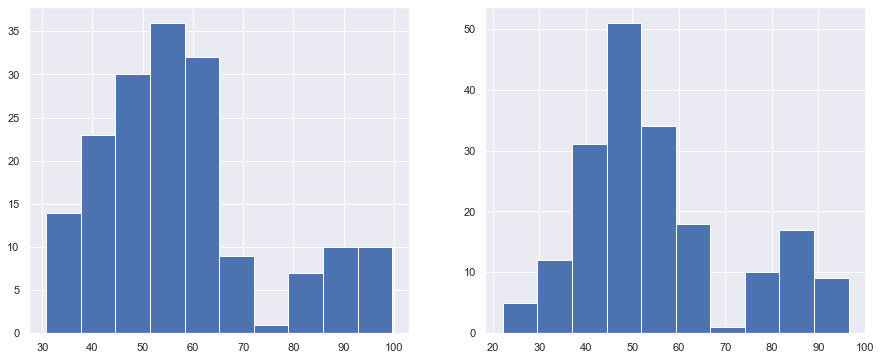

In [124]:
fig, axes = plt.subplots(1, 2)

df[df['Promotion']==1]['SalesInThousands'].hist(ax=axes[0],figsize=(15,6))
df[df['Promotion']==3]['SalesInThousands'].hist(ax=axes[1])

In [53]:
print(np.var(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values)/ np.var(df.loc[df['Promotion'] == 3, 'SalesInThousands'].values))

0.974333139752645


In [49]:
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
                       equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


Our t-test shows that the marketing performances for these two groups are not significantly different.

Our P-Value is higher than the significance level even at a 90% confidence,which suggests that there is not enough evidence to REJECT the Null Hypothesis. Meaning the there is no statistical difference between the two groups. 

Our t-test shows that the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2.

**Effect Size:**

In [97]:
group3 = df.loc[df['Promotion'] == 3, 'SalesInThousands'].values

cohens_d = (mean(group1) - mean(group3)) / (sqrt((stdev(group1) ** 2 + stdev(group3) ** 2) / 2))

print(cohens_d)

0.16413487013294842


Small, weak effect.

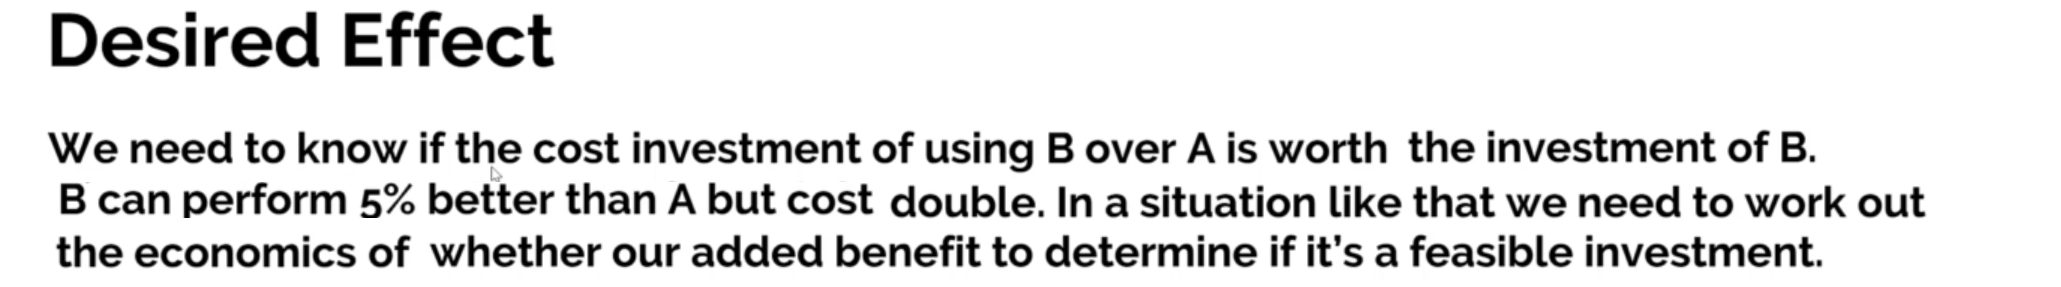